In [ ]:
import matplotlib.pyplot as plt
import re
import matplotlib.patches as mpatches
import numpy as np

In [ ]:
logs_path = "../trained-models/ensemble-mycnn/7/logs/use_tb_logger=True-2023_09_29_16_06.log"
pattern = r".*?Estimator: \d+ \| Epoch: \d+ \| Batch: \d+ \| RegLoss: \d+\.\d+"
lines = []

with open(logs_path, "r") as f:
    for line in f:
        match = re.match(pattern, line)
        if match:
            lines.append(match.string[65:-2])

In [ ]:
record = {
    0: {"epoch" : [], "loss": [], "batch": []},
    1: {"epoch" : [], "loss": [], "batch": []},
    2: {"epoch" : [], "loss": [], "batch": []},
    3: {"epoch" : [], "loss": [], "batch": []},
    4: {"epoch" : [], "loss": [], "batch": []},
}

In [ ]:
for line in lines:
    estimator, epoch, batch, loss = int(line[11:14]), int(line[24:27]), int(line[37:40]), float(line[-7:])
    record[estimator]["epoch"].append(epoch)
    record[estimator]["loss"].append(loss)
    record[estimator]["batch"].append(batch)

In [ ]:
new_rec = {
    0: {"epoch": [], "loss": []},
    1: {"epoch": [], "loss": []},
    2: {"epoch": [], "loss": []},
    3: {"epoch": [], "loss": []},
    4: {"epoch": [], "loss": []}
}

for estimator in range(5):
    for idx, batch in enumerate(record[estimator]["batch"]):
        if batch == 820:
            epoch = record[estimator]["epoch"][idx]
            loss = record[estimator]["loss"][idx]
            print(batch, epoch, loss)
            new_rec[estimator]['epoch'].append(epoch)
            new_rec[estimator]['loss'].append(loss)
    print("\n\n")

In [ ]:
plt.figure(figsize=(16, 10), dpi=700)
for i in range(5): 
    plt.plot(new_rec[i]["epoch"], new_rec[i]["loss"], label=f'estimator: {i + 1}', linewidth=3)

plt.xlabel("Epoch", fontsize=20)
plt.ylabel("Loss", fontsize=20)
plt.legend(loc='right', fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [ ]:
y_data = [99.1569, 99.0350, 98.9502, 98.6373, 98.3987, 98.0594, 98.1177, 97.4072, 96.9618]
x_data = ["GliomaCNN", "BEiT with one\nhidden layer", "BEiT", "Swin-Transformer", 
          "VGG-19", "DenseNet-121", "ResNet-152",
          "ViT with one\nhidden layer", "ViT"]

plt.figure(figsize=(10, 6), dpi=600)
for i in range(len(x_data)):
    plt.text(i, y_data[i] + 0.05, str(y_data[i]) + "%", ha='center', fontsize=10)

plt.bar(x_data, y_data)
plt.ylim(98, 100)
red_patch = mpatches.Patch(label='Accuracy (%)')
plt.legend(handles=[red_patch])
plt.yticks(np.arange(95, 100, 0.5), fontsize=10)
plt.xticks(rotation=45, fontsize=10)
plt.show()

In [ ]:
y_data = [98.4730, 98.8494, 99.1410, 99.1569]
x_data = ["Base model", "Three conv and\nmaxpool layers", "GELU activation", "RMSProp optimizer"]

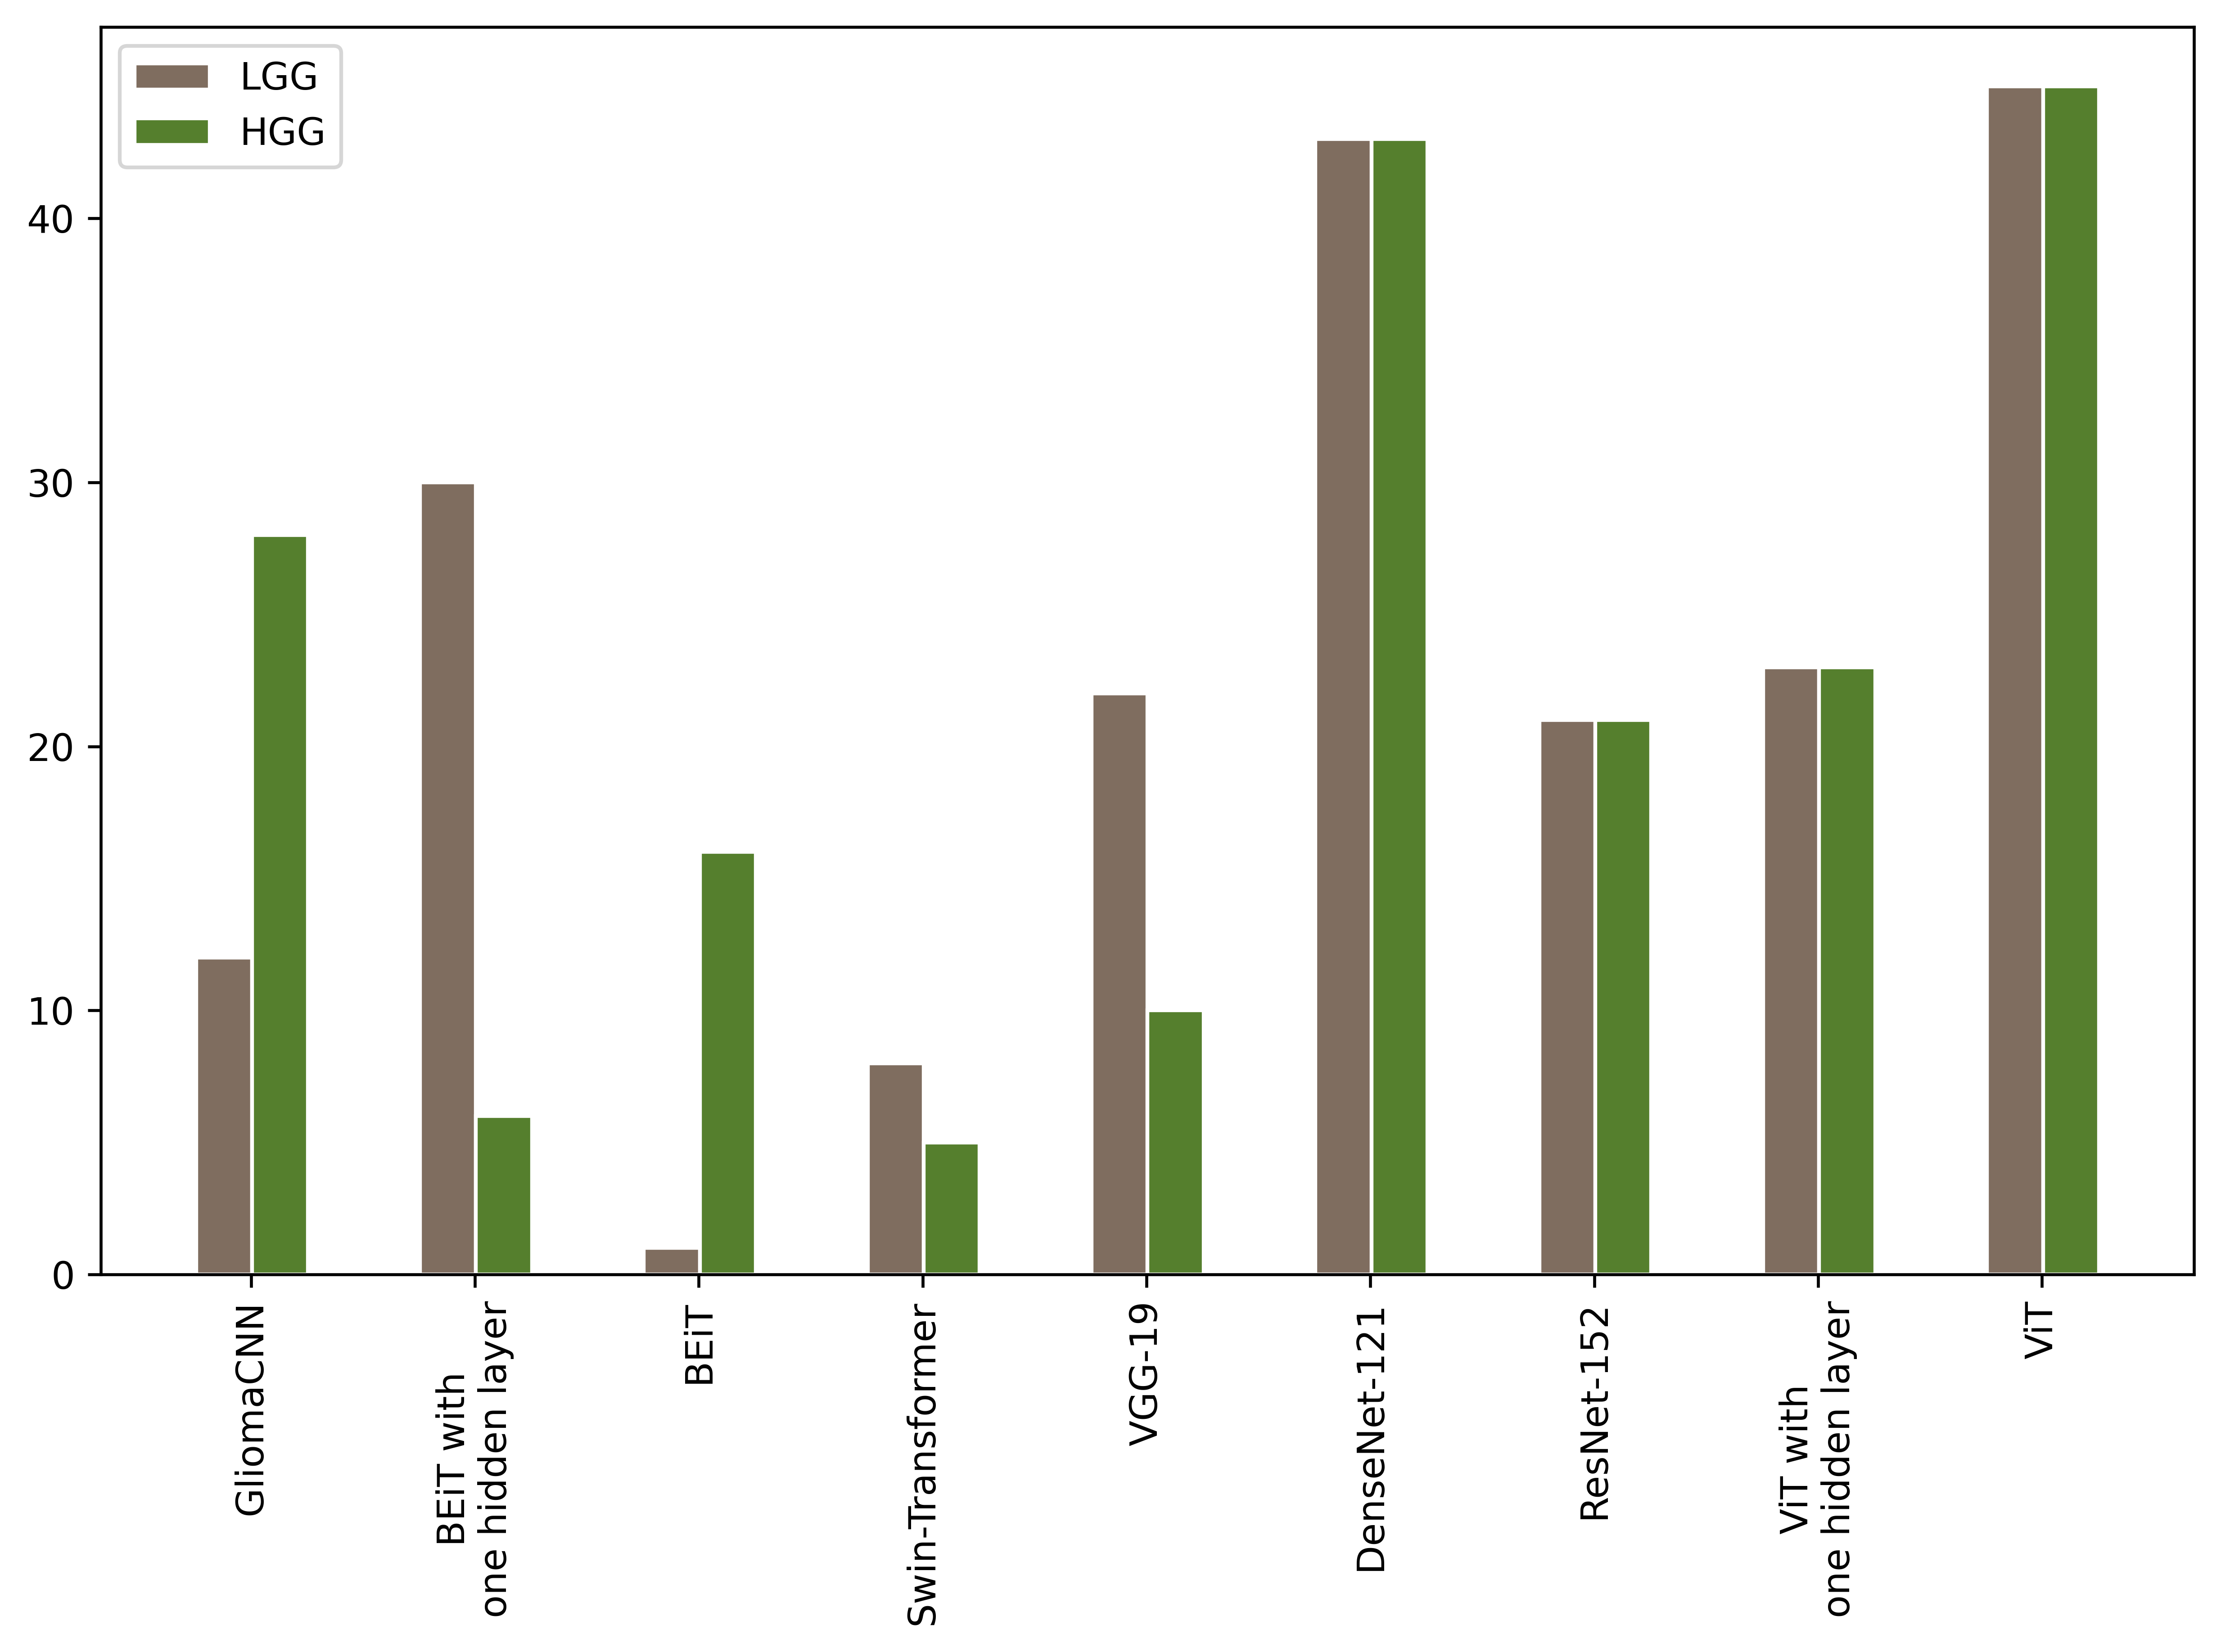

In [22]:
barWidth = 0.25
bars1 = [12, 30, 1, 8, 22, 43, 21, 23, 45]
bars2 = [28, 6, 16, 5, 10, 43, 21, 23, 45]
# bars3 = [29, 3, 24, 25, 17]
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
plt.figure(figsize=(10, 6), dpi=600)
# Make the plot
plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='LGG')
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='HGG')
# plt.bar(r3, bars3, color='#2d7f5e', width=barWidth, edgecolor='white', label='var3')

models = ["GliomaCNN", "BEiT with\none hidden layer", "BEiT", "Swin-Transformer", "VGG-19", "DenseNet-121", "ResNet-152", "ViT with\none hidden layer", "ViT"] 
# Add xticks on the middle of the group bars
# plt.xlabel('group', fontweight='bold')
plt.xticks([r - 0.13 + barWidth for r in range(len(bars1))], models, rotation=90)
 
# Create legend & Show graphic
plt.legend()
plt.show()